In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# For Stats
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
df = pd.read_csv('Employee.csv')
df.head()

#Education    : The educational qualifications of employees.
#Joining Year : The year each employee joined the company, indicating their length of service.
#City         : The location or city where each employee is based or works.
#Payment Tier : Categorization of employees into different salary tiers.
#Age          : The age of each employee, providing demographic insights.
#Gender       : Gender identity of employees, promoting diversity analysis.
#Ever Benched : Indicates if an employee has ever been temporarily without assigned work.
#Experience   : The number of years of experience employees have in their current field.
#Leave or Not : Target column.

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.shape

(4653, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [9]:
df = df.rename(columns={'JoiningYear': 'Joining_Year',
                          'PaymentTier': 'Payment_Tier',
                          'EverBenched': 'Ever_Benched',
                          'ExperienceInCurrentDomain': 'Experience',
                          'LeaveOrNot': 'Left'})

# Display all column names after the update
df.columns

Index(['Education', 'Joining_Year', 'City', 'Payment_Tier', 'Age', 'Gender',
       'Ever_Benched', 'Experience', 'Left'],
      dtype='object')

In [10]:
df.isna().sum()

Education       0
Joining_Year    0
City            0
Payment_Tier    0
Age             0
Gender          0
Ever_Benched    0
Experience      0
Left            0
dtype: int64

In [11]:
df.duplicated().sum()

1889

1,889 rows contain duplicates. That is 41% of the data.

In [12]:
df[df.duplicated()].head()

,Education,Joining_Year,City,Payment_Tier,Age,Gender,Ever_Benched,Experience,Left
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,Education,Joining_Year,City,Payment_Tier,Age,Gender,Ever_Benched,Experience,Left
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [14]:
# Convert 'Payment_Tier' to a categorical data type
df_copy = df1.copy()
df_copy['Payment_Tier'] = df_copy['Payment_Tier'].astype('category').cat.as_ordered()

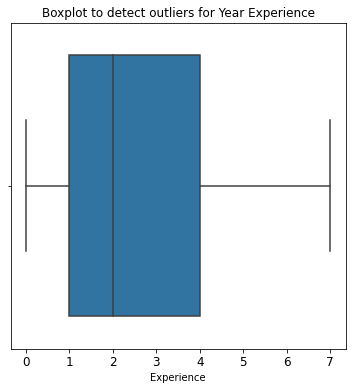

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Year Experience', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_copy['Experience'])
plt.show()

In [16]:
# Get numbers of people who left vs. stayed
print(df_copy['Left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df_copy['Left'].value_counts(normalize=True))

0    1676
1    1088
Name: Left, dtype: int64

0    0.606368
1    0.393632
Name: Left, dtype: float64


In [17]:
Education_counts = df_copy['Education'].value_counts()
print(Education_counts)

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64


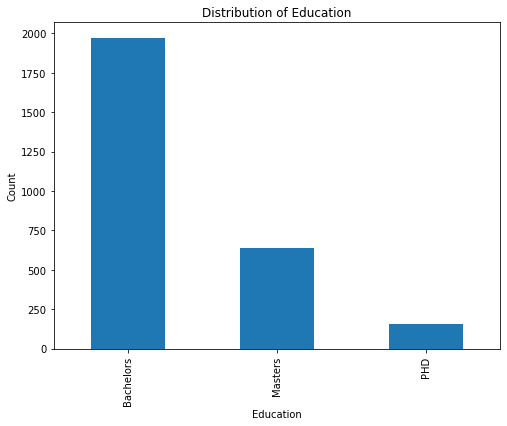

In [18]:
plt.figure(figsize=(8, 6))
Education_counts.plot(kind='bar')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

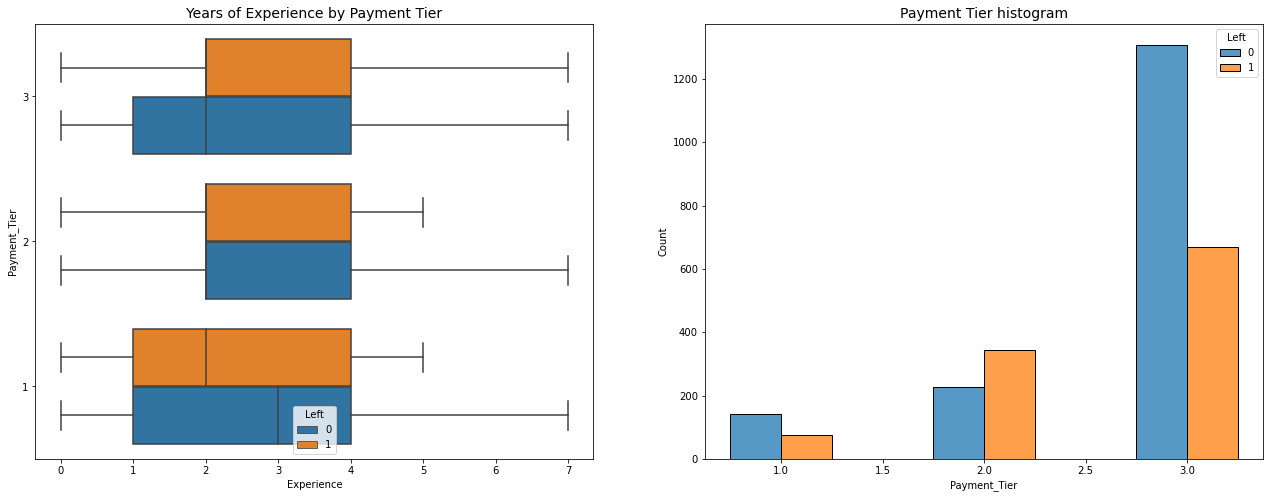

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `Experience` distributions for `Payment_Tier`, comparing employees who stayed versus those who left
sns.boxplot(data=df_copy, x='Experience', y='Payment_Tier', hue='Left',orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Years of Experience by Payment Tier', fontsize='14')

# Create histogram showing distribution of `Payment_Tier`, comparing employees who stayed versus those who l
sns.histplot(data=df_copy, x='Payment_Tier', hue='Left', multiple='dodge', shrink=0.5, element='bars', ax=ax[1])
ax[1].set_title('Payment Tier histogram', fontsize=14)

# Display the plots
plt.show()

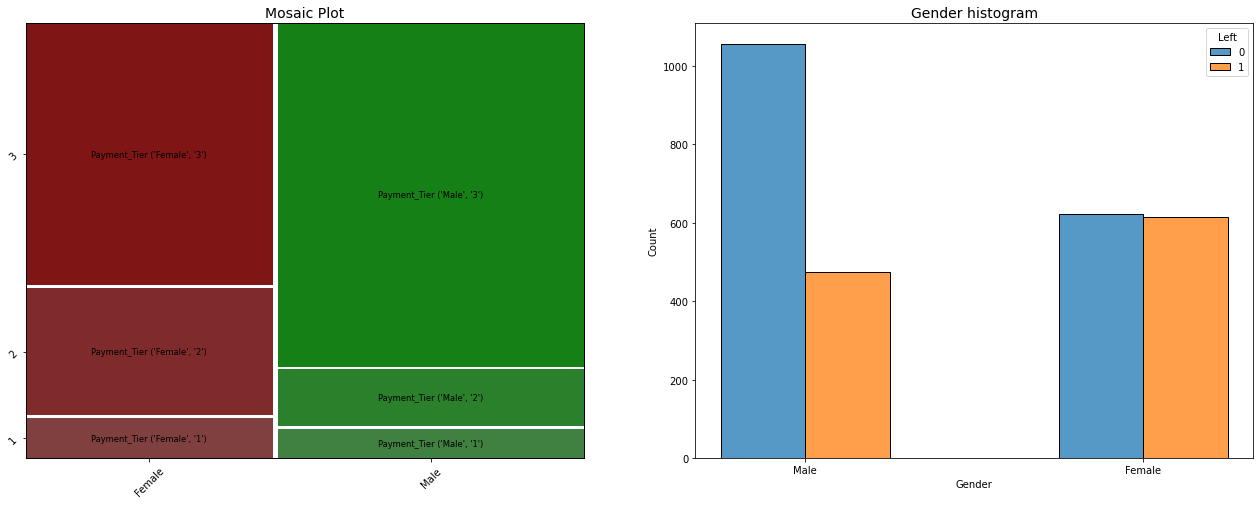

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create mosaic plot showing distributions of `Payment_Tier` by Gender
mosaic(
    df_copy, ['Gender', 'Payment_Tier'],
    label_rotation=45,
    gap=0.01,
    properties={'Gender': {'color': 'red'}, 'Payment_Tier': {'color': 'green'}},
    labelizer=lambda k: f"Payment_Tier {k}",
ax=ax[0])
ax[0].set_title('Mosaic Plot', fontsize=14)

    
# Create histogram showing distribution of `Gender`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='Gender', hue='Left', multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Gender histogram', fontsize='14')
plt.show()



In [21]:
df1.groupby(['Gender'])['Payment_Tier'].value_counts()



Gender  Payment_Tier
Female  3                753
        2                367
        1                115
Male    3               1223
        2                203
        1                103
Name: Payment_Tier, dtype: int64

In [22]:
df1.groupby(['Gender'])['Payment_Tier'].value_counts(normalize=True)

Gender  Payment_Tier
Female  3               0.609717
        2               0.297166
        1               0.093117
Male    3               0.799869
        2               0.132767
        1               0.067364
Name: Payment_Tier, dtype: float64

**Insight:** 80% of men are in the highest payment tier, compared to only 60% of women.


In [23]:
df1.groupby(['Left'])['Payment_Tier'].value_counts()

Left  Payment_Tier
0     3               1308
      2                227
      1                141
1     3                668
      2                343
      1                 77
Name: Payment_Tier, dtype: int64

### Percentage of Churn by Payment Tier (2 s.f):

i. Payment Tier 1: 55%  
ii. Payment Tier 2: 151%  
iii. Payment Tier 3: 51%

**Insight:** People in Payment Tier 3 have the lowest percentage of leaving while those on tier 1 have the most.


In [24]:
df1.groupby(['Left'])['Education'].value_counts()

Left  Education
0     Bachelors    1232
      Masters       328
      PHD           116
1     Bachelors     739
      Masters       309
      PHD            40
Name: Education, dtype: int64

**Insights:** 70% of those who left have a bachelor degree.
              Those who left and have Masters are almost the same in number as those who stayed.


In [25]:
# Calculate mean and median Experience of employees who left and those who stayed
df1.groupby(['Left'])['Experience'].agg([np.mean,np.median])

,mean,median
Left,,
0,2.671838,2
1,2.602022,2


### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

In [26]:
df1['Education'] = df1['Education'].astype('category').cat.codes



<ipython-input-26-717cbd7b86fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Education'] = df1['Education'].astype('category').cat.codes


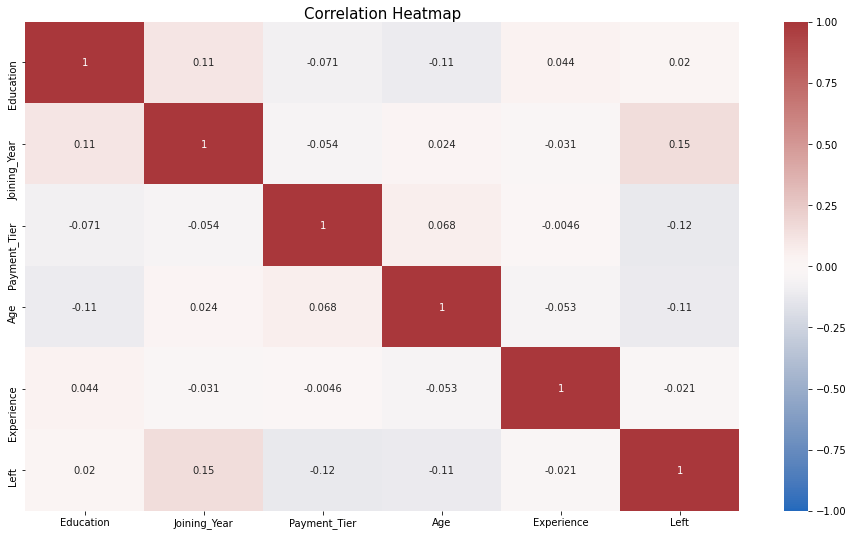

In [27]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=1);

In [28]:
df1 = df1.copy()


df1['Ever_Benched'] = np.where(df1['Ever_Benched'] == 'Yes', 1, 0)
df1['Gender'] = np.where(df1['Gender'] == 'Male', 1, 0)

In [29]:
df1.columns

Index(['Education', 'Joining_Year', 'City', 'Payment_Tier', 'Age', 'Gender',
       'Ever_Benched', 'Experience', 'Left'],
      dtype='object')

In [30]:
df1 = pd.get_dummies(df1, columns=['Joining_Year', 'City'], prefix=['Joining_Year', 'City'], drop_first=False)


In [31]:
df1.head() 

,Education,Payment_Tier,Age,Gender,Ever_Benched,Experience,Left,Joining_Year_2012,Joining_Year_2013,Joining_Year_2014,Joining_Year_2015,Joining_Year_2016,Joining_Year_2017,Joining_Year_2018,City_Bangalore,City_New Delhi,City_Pune
0,0,3,34,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,1,28,0,0,3,1,0,1,0,0,0,0,0,0,0,1
2,0,3,38,0,0,2,0,0,0,1,0,0,0,0,0,1,0
3,1,3,27,1,0,5,1,0,0,0,0,1,0,0,1,0,0
4,1,3,24,1,1,2,1,0,0,0,0,0,1,0,0,0,1


In [32]:
X = df1.drop('Left', axis=1)

# Display the first few rows of the selected features 
X.head()

,Education,Payment_Tier,Age,Gender,Ever_Benched,Experience,Joining_Year_2012,Joining_Year_2013,Joining_Year_2014,Joining_Year_2015,Joining_Year_2016,Joining_Year_2017,Joining_Year_2018,City_Bangalore,City_New Delhi,City_Pune
0,0,3,34,1,0,0,0,0,0,0,0,1,0,1,0,0
1,0,1,28,0,0,3,0,1,0,0,0,0,0,0,0,1
2,0,3,38,0,0,2,0,0,1,0,0,0,0,0,1,0
3,1,3,27,1,0,5,0,0,0,0,1,0,0,1,0,0
4,1,3,24,1,1,2,0,0,0,0,0,1,0,0,0,1


In [33]:
y = df1['Left']

y.head() 

0    0
1    1
2    0
3    1
4    1
Name: Left, dtype: int64

In [34]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [35]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [36]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

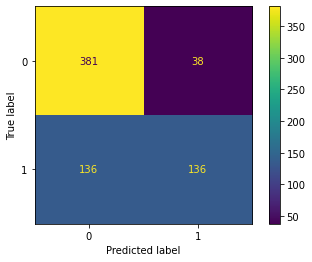

In [37]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()


In [38]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.74      0.91      0.81       419
    Predicted would leave       0.78      0.50      0.61       272

                 accuracy                           0.75       691
                macro avg       0.76      0.70      0.71       691
             weighted avg       0.75      0.75      0.73       691



### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [39]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
%%time
tree1.fit(X_train, y_train)

Wall time: 1.56 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'precision', 'f1', 'roc_auc'})

In [41]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [42]:
# Check best AUC score on CV
tree1.best_score_

0.8134295561819915

In [43]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [44]:
fb=pd.DataFrame(tree1.cv_results_)

In [45]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.82183,0.582108,0.680711,0.785825,0.81343


In [46]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [47]:
%%time
rf.fit(X_train, y_train)

C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 342, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\antre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 109, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samples))
ValueError: `max_samples` must be in range (0, 1) but got value 1.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\antre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed

Wall time: 2min 32s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy', 'recall', 'precision', 'f1', 'roc_auc'})

In [48]:
# Define a path to the folder where you want to save the model
path = r'\Users\antre\OneDrive\Υπολογιστής\DataSets D.A'


In [49]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [50]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [51]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [52]:
# Write pickle
write_pickle(path, rf, 'hr_rf')

In [53]:
rf = read_pickle(path, 'hr_rf')

In [54]:
# Check best params
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [55]:
# Get all CV scores
rf_cv_results = make_results('random forest cv', rf, 'auc')
print(tree1_cv_results)
print(rf_cv_results)

              model  precision    recall        F1  accuracy      auc
0  decision tree cv    0.82183  0.582108  0.680711  0.785825  0.81343
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.895593  0.553922  0.682764  0.798367  0.83054


In [56]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [57]:
# Get predictions on test data
rf_test_scores = get_scores('random forest1 test', rf, X_test, y_test)
rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.903614,0.551471,0.684932,0.800289,0.756642


This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

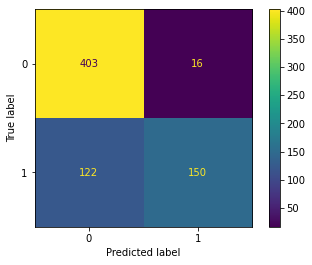

In [58]:
# Generate array of values for confusion matrix
preds = rf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf.classes_)
disp.plot(values_format='');

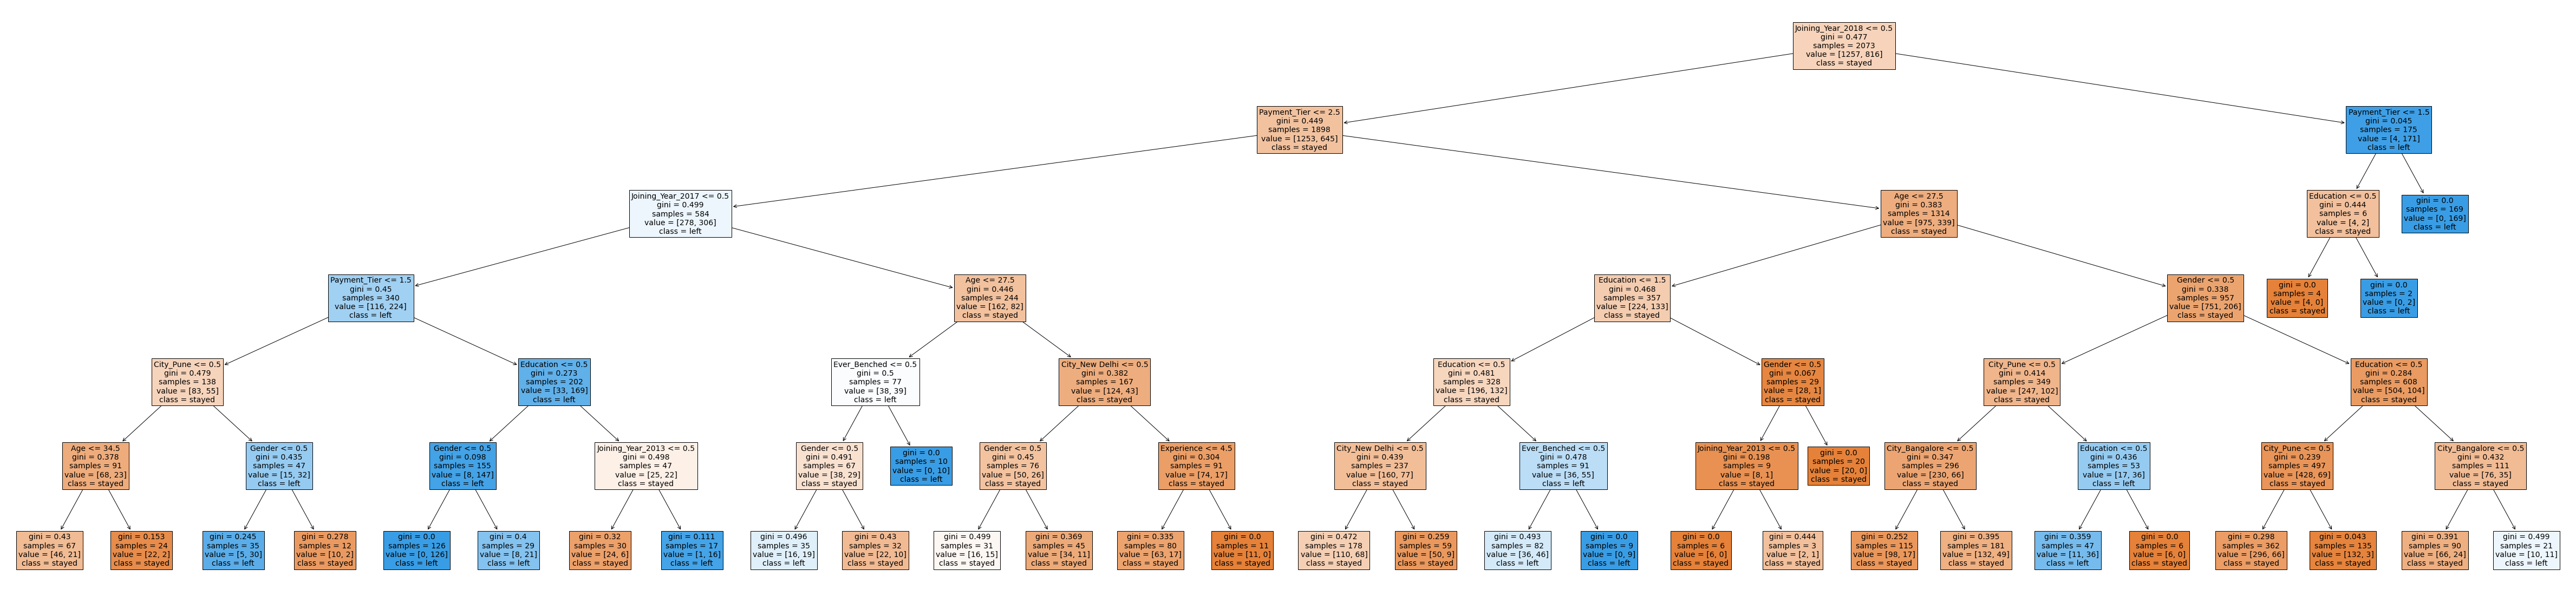

In [59]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [60]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
Joining_Year_2018,0.314147
Payment_Tier,0.226460
Education,0.117517
City_Pune,0.084759
Joining_Year_2017,0.071434
Gender,0.054682
Age,0.051343
Joining_Year_2013,0.029847
Ever_Benched,0.021057
City_New Delhi,0.016085


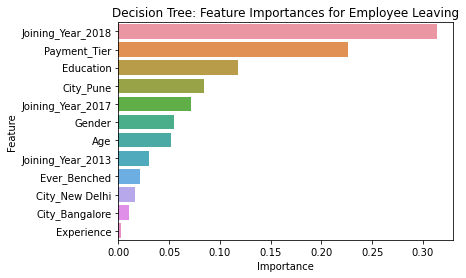

In [61]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `Joining_Year_2018`, `Payment_Tier`, `Education`, and `City_Pune` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 75%, recall of 75%, f1-score of 73% (all weighted averages), and accuracy of 75%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 75.7%, precision of 90.4%, recall of 55.1%, f1-score of 68.5%, and accuracy of 80%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations

The models and the feature importances extracted from the models confirm that employees who **joined** the company in **2018** are most likely to leave. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Initiate dialogue with the leader of the group comprised of employees who joined in 2018 to discern their requirements. Subsequently, offer tailored incentives to secure their sustained commitment, thereby preventing attrition. Alternative, encourage the leader to communicate effectively with the remaining team to reinforce a collective commitment and dissuade any inclination toward departure.

* Give employes bonuses based on their performance, especially to those in the lower payment tier.


**References:**

https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset